In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("clustering.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
data.drop("Loan_ID",axis=1, inplace=True)

In [7]:
data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [8]:
data.Dependents.unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [9]:
data=data.dropna()

In [10]:
data.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [11]:
data.Dependents=data.Dependents.str.replace("+","")

C:\Users\abc\AppData\Local\Temp\ipykernel_1032\1652676036.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Dependents=data.Dependents.str.replace("+","")
C:\Users\abc\AppData\Local\Temp\ipykernel_1032\1652676036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Dependents=data.Dependents.str.replace("+","")


In [12]:
data.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [13]:
data.Dependents.unique()

array(['1', '0', '2', '3'], dtype=object)

In [14]:
data.Dependents=data.Dependents.astype("int64")

C:\Users\abc\AppData\Local\Temp\ipykernel_1032\2822245182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Dependents=data.Dependents.astype("int64")


In [15]:
data.Dependents

0      1
1      0
2      0
3      0
4      0
      ..
376    3
377    0
378    0
379    3
380    0
Name: Dependents, Length: 308, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             308 non-null    object 
 1   Married            308 non-null    object 
 2   Dependents         308 non-null    int64  
 3   Education          308 non-null    object 
 4   Self_Employed      308 non-null    object 
 5   ApplicantIncome    308 non-null    int64  
 6   CoapplicantIncome  308 non-null    float64
 7   LoanAmount         308 non-null    float64
 8   Loan_Amount_Term   308 non-null    float64
 9   Credit_History     308 non-null    float64
 10  Property_Area      308 non-null    object 
 11  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 31.3+ KB


In [17]:
data=pd.get_dummies(data)
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
1,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
3,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
4,0,2333,1516.0,95.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,1
377,0,3232,1950.0,108.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1
378,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,0,1
379,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               308 non-null    int64  
 1   ApplicantIncome          308 non-null    int64  
 2   CoapplicantIncome        308 non-null    float64
 3   LoanAmount               308 non-null    float64
 4   Loan_Amount_Term         308 non-null    float64
 5   Credit_History           308 non-null    float64
 6   Gender_Female            308 non-null    uint8  
 7   Gender_Male              308 non-null    uint8  
 8   Married_No               308 non-null    uint8  
 9   Married_Yes              308 non-null    uint8  
 10  Education_Graduate       308 non-null    uint8  
 11  Education_Not Graduate   308 non-null    uint8  
 12  Self_Employed_No         308 non-null    uint8  
 13  Self_Employed_Yes        308 non-null    uint8  
 14  Property_Area_Rural      3

In [19]:
# #standardising the data
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# data_scaled = scaler.fit_transform(data) # no need to scale data

In [20]:
# pd.DataFrame(data_scaled).describe()

NameError: name 'data_scaled' is not defined

In [30]:
from sklearn.cluster import KMeans  

In [32]:
kmeans = KMeans(n_clusters=2, init='k-means++')  
kmeans.fit(data)     

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2)

In [33]:
kmeans.inertia_

1281731253.183042

In [34]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
SSE= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for clusters in range(1, 20):  
    kmeans = KMeans(n_clusters=clusters, init='k-means++')  
    kmeans.fit(data)  
    SSE.append(kmeans.inertia_)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

In [35]:
kmeans.cluster_centers_

array([[ 5.71428571e-01,  2.68426190e+03,  2.04892857e+03,
         1.15619048e+02,  3.38571429e+02,  7.38095238e-01,
         9.52380952e-02,  9.04761905e-01,  2.61904762e-01,
         7.38095238e-01,  6.19047619e-01,  3.80952381e-01,
         9.52380952e-01,  4.76190476e-02,  2.85714286e-01,
         4.04761905e-01,  3.09523810e-01,  2.85714286e-01,
         7.14285714e-01],
       [ 0.00000000e+00,  1.83600000e+03,  3.38370000e+04,
         9.00000000e+01,  3.60000000e+02,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 2.00000000e+00,  5.79833333e+03,  1.25200000e+03,
         7.80000000e+01,  3.60000000e+02,  1.00000000e+00,
         2.77555756e-17,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  5.55111512e-17,
    

In [36]:
kmeans.inertia_

59380681.13248607

Text(0, 0.5, 'Inertia')

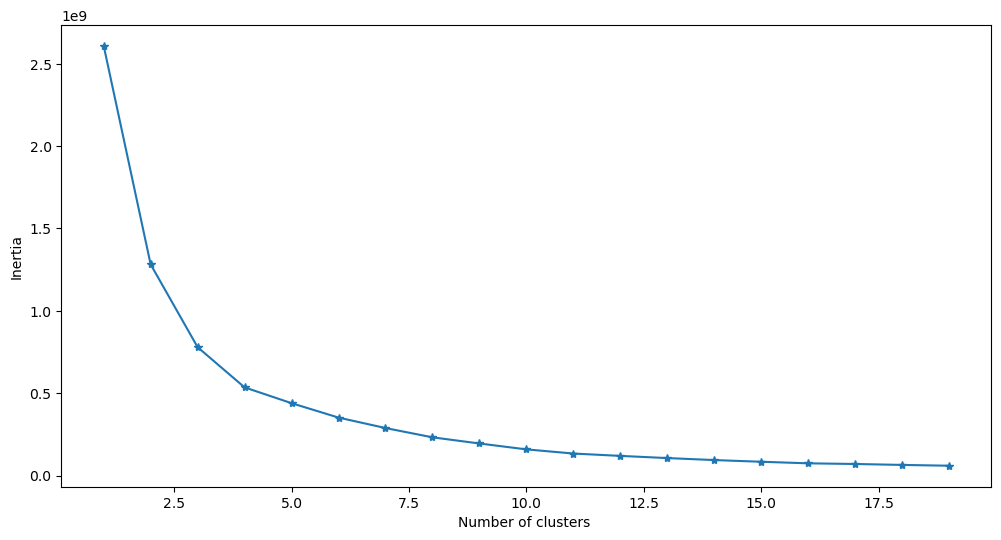

In [37]:
frame=pd.DataFrame({"cluster":range(1,20),"SSE":SSE})
plt.figure(figsize=(12,6))
plt.plot(frame["cluster"],frame["SSE"],marker="*")
plt.xlabel("Number of clusters ")
plt.ylabel("Inertia")

In [41]:
kmeans=KMeans( n_clusters=9,init="k-means++") #n_jobs work on 
kmeans.fit(data)
pred=kmeans.predict(data)
pred

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 6, 7, 0, 7, 6, 7, 7, 4, 6, 4, 0, 7, 7, 4, 6, 6, 4, 1, 1, 1, 6,
       7, 1, 0, 0, 3, 1, 7, 6, 4, 4, 7, 7, 1, 1, 3, 6, 4, 1, 0, 4, 7, 6,
       4, 7, 4, 4, 7, 7, 1, 1, 4, 6, 7, 7, 4, 3, 1, 6, 6, 4, 4, 3, 6, 7,
       6, 6, 4, 4, 3, 1, 7, 3, 7, 4, 0, 6, 6, 7, 1, 0, 4, 3, 6, 6, 4, 1,
       7, 4, 7, 4, 6, 6, 4, 4, 4, 7, 1, 4, 4, 6, 1, 6, 6, 1, 0, 1, 4, 7,
       1, 6, 1, 1, 0, 7, 1, 4, 6, 8, 7, 0, 3, 8, 0, 0, 7, 7, 6, 7, 0, 4,
       7, 0, 4, 1, 7, 6, 7, 7, 4, 7, 1, 4, 7, 7, 1, 7, 1, 4, 1, 4, 1, 4,
       7, 7, 4, 7, 1, 1, 7, 6, 1, 6, 1, 4, 7, 4, 4, 1, 6, 1, 6, 4, 6, 6,
       1, 7, 4, 6, 4, 1, 4, 1, 0, 0, 6, 1, 4, 8, 6, 4, 0, 4, 7, 7, 4, 7,
       1, 6, 1, 1, 7, 6, 6, 5, 6, 4, 7, 6, 4, 7, 6, 7, 1, 0, 7, 3, 4, 0,
       6, 6, 0, 0, 7, 4, 7, 0, 1, 1, 4, 1, 7, 1, 7, 0, 4, 4, 4, 0, 4, 0,
       1, 1, 7, 4, 6, 7, 7, 6, 6, 4, 1, 6, 7, 6, 3, 6, 1, 1, 1, 3, 3, 7,
       6, 7, 6, 0, 4, 7, 0, 4, 6, 6, 6, 1, 6, 7, 6, 7, 4, 7, 3, 4, 4, 0,
       6, 1, 6, 1, 0, 6, 1, 7, 2, 6, 7, 7, 6, 6, 3,

In [42]:
kmeans.inertia_

191695208.67579037

In [47]:
kmeans=KMeans( n_clusters=10,init="k-means++") #n_jobs work on 
kmeans.fit(data)
pred=kmeans.predict(data)
pred

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 3, 5, 0, 5, 3, 5, 5, 9, 3, 9, 0, 5, 5, 1, 3, 3, 9, 1, 1, 1, 3,
       5, 1, 0, 0, 8, 1, 5, 3, 9, 9, 5, 5, 1, 8, 8, 3, 9, 1, 0, 9, 5, 3,
       9, 5, 9, 9, 5, 5, 8, 1, 9, 3, 5, 5, 9, 8, 8, 1, 3, 9, 9, 6, 3, 5,
       3, 3, 9, 9, 8, 1, 5, 8, 5, 9, 0, 3, 3, 5, 1, 0, 9, 8, 3, 3, 9, 1,
       5, 9, 5, 9, 3, 3, 9, 9, 9, 5, 1, 9, 9, 3, 1, 3, 3, 1, 0, 8, 1, 5,
       1, 3, 1, 8, 0, 5, 1, 9, 3, 4, 5, 0, 8, 4, 0, 0, 5, 5, 3, 5, 0, 9,
       5, 0, 9, 1, 1, 3, 5, 5, 9, 5, 1, 9, 5, 5, 8, 5, 1, 9, 1, 9, 1, 9,
       5, 5, 9, 5, 1, 1, 5, 3, 5, 3, 1, 9, 5, 9, 9, 1, 3, 1, 3, 9, 3, 3,
       1, 5, 9, 3, 9, 1, 9, 1, 0, 0, 3, 1, 9, 4, 3, 9, 0, 9, 5, 5, 9, 5,
       1, 3, 1, 1, 5, 3, 3, 2, 3, 9, 5, 3, 9, 5, 3, 5, 1, 0, 5, 8, 9, 0,
       3, 3, 0, 0, 5, 9, 5, 0, 1, 1, 9, 1, 5, 1, 5, 0, 9, 9, 9, 0, 9, 0,
       1, 1, 5, 9, 3, 8, 5, 3, 3, 9, 1, 1, 5, 3, 5, 3, 1, 1, 1, 6, 8, 5,
       3, 5, 3, 0, 9, 5, 0, 9, 3, 3, 3, 1, 3, 5, 3, 5, 9, 5, 8, 9, 9, 0,
       3, 1, 3, 1, 0, 3, 8, 5, 7, 3, 5, 5, 3, 3, 8,

In [48]:
kmeans.inertia_

158597879.74805862